In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from itertools import combinations
from itertools import product
from scipy.stats import chi2_contingency

In [91]:
import warnings
warnings.filterwarnings('ignore')

In [92]:
df = pd.read_csv('Diabetes_uncleaned.csv')
df.head()


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1009 non-null   int64  
 1   No_Pation  1009 non-null   int64  
 2   Gender     1009 non-null   object 
 3   AGE        1008 non-null   float64
 4   Urea       1008 non-null   float64
 5   Cr         1007 non-null   float64
 6   HbA1c      1006 non-null   float64
 7   Chol       1007 non-null   float64
 8   TG         1007 non-null   float64
 9   HDL        1008 non-null   float64
 10  LDL        1007 non-null   float64
 11  VLDL       1008 non-null   float64
 12  BMI        1009 non-null   float64
 13  CLASS      1009 non-null   object 
dtypes: float64(10), int64(2), object(2)
memory usage: 110.5+ KB


In [94]:
df.describe()# prints the statistics of the numerical columns in the data

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1009.000000,1.009000e+03,1008.000000,1008.000000,1007.000000,1006.000000,1007.000000,1007.000000,1008.000000,1007.000000,1008.000000,1009.000000
mean,339.161546,2.717448e+05,53.620040,5.131094,68.973188,8.284155,4.863873,2.348769,1.204216,2.610119,1.850595,29.589911
std,239.738169,3.365681e+06,8.740975,2.931136,59.813297,2.533576,1.297326,1.397487,0.658158,1.116095,3.649859,4.946246
min,1.000000,1.230000e+02,25.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,127.000000,2.406500e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,296.000000,3.439900e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,548.000000,4.539000e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [95]:
#Checking for null values
df.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          1
Urea         1
Cr           2
HbA1c        3
Chol         2
TG           2
HDL          1
LDL          2
VLDL         1
BMI          0
CLASS        0
dtype: int64

In [96]:
#Checking for duplicates
df.duplicated().sum()

0

If there were duplicates in the dataset,then we would write df.drop_duplicates(inplace=True) to 
drop dupicates.

In [97]:
df.shape #It gives the no. of rows and columns present in the DataFrame

(1009, 14)

In [98]:
df.size #It means that the DataFrame has 14126 elements

14126

In [99]:
#Handling missing data
df_cleaned = df.dropna()

In [100]:
df.rename(columns={
    'No_Pation': 'No. of Patients',
    'Cr': 'Creatinine',
    'HbA1c': 'Haemoglobin A1c',
    'Chol': 'Cholestrol',
    'TG': 'Triglycerides',
    'HDL': 'High-Density Lipoprotein',
    'LDL': 'Low-Density Lipoprotein',
    "VLDL":"Very Low-Density Lipoprotein"
}, inplace=True)

# Displaying the updated DataFrame : data
df.head()

,ID,No. of Patients,Gender,AGE,Urea,Creatinine,Haemoglobin A1c,Cholestrol,Triglycerides,High-Density Lipoprotein,Low-Density Lipoprotein,Very Low-Density Lipoprotein,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


***UNIVARIATE ANALYSIS***

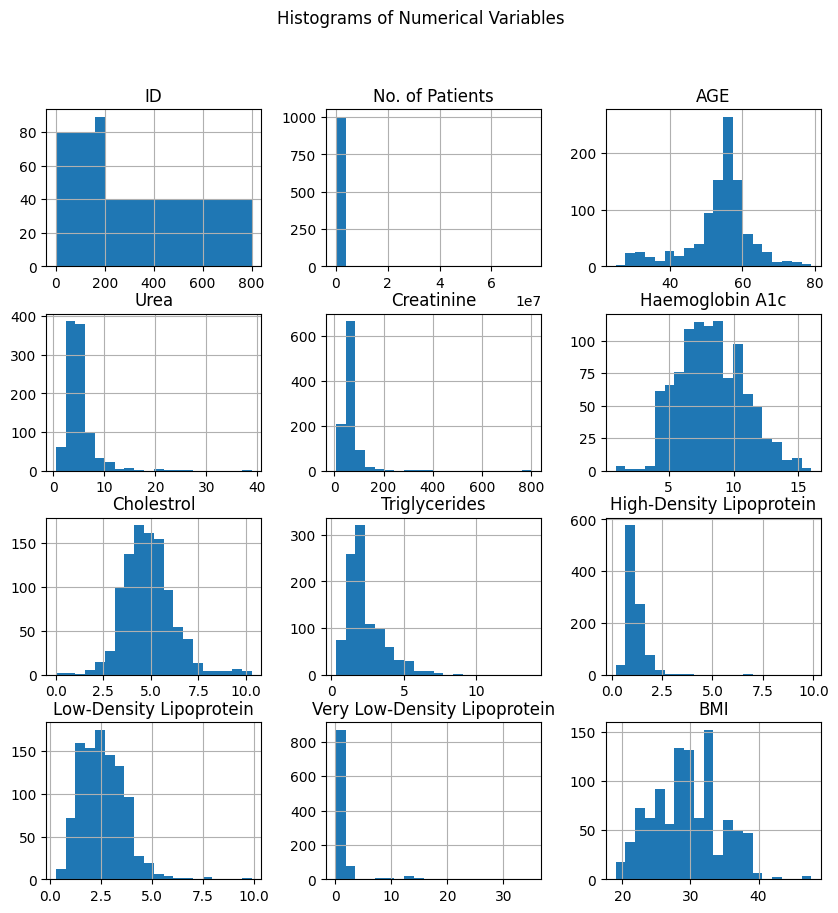

In [101]:
df.hist(figsize=(10, 10), bins=20)
plt.suptitle("Histograms of Numerical Variables")
plt.show()

Conclusion:
BloodPressure: You might observe a skewed distribution, indicating that most people have higher blood pressure.
BMI: The BMI shows a normal distribution with a slight skew, indicating general health or obesity trends.
Age: The age distribution shows that the dataset has more individuals in certain age ranges.

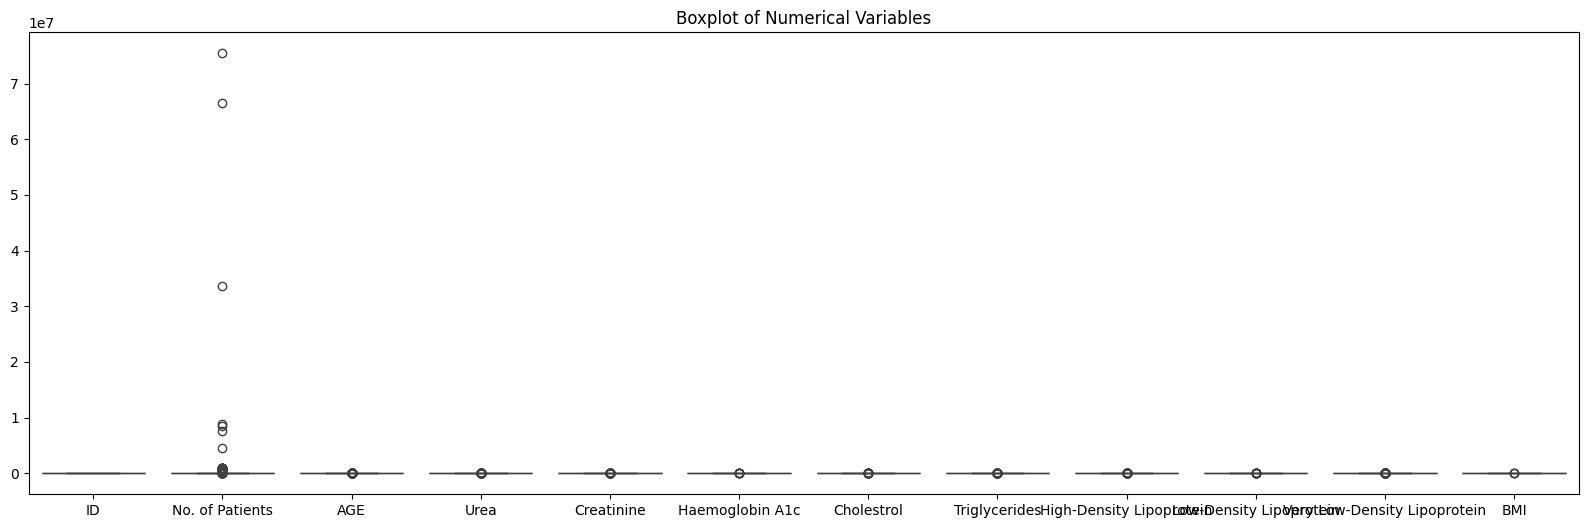

In [105]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Numerical Variables')
plt.show()

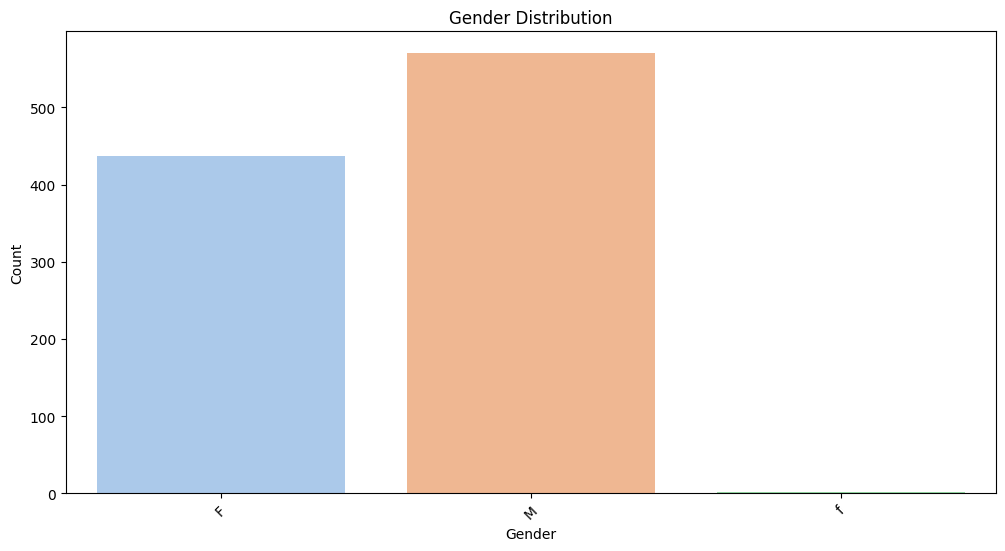

In [71]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Gender Distribution')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

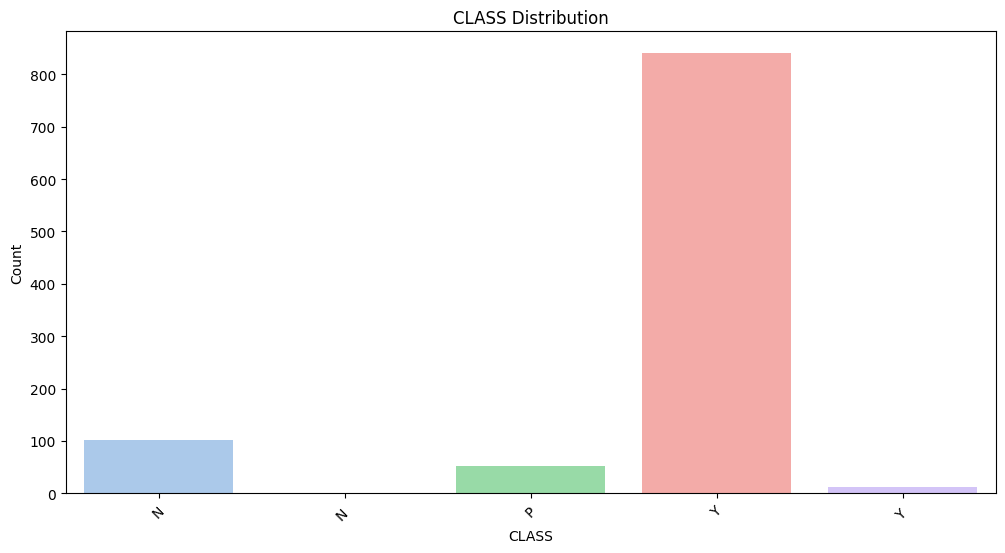

In [72]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='CLASS', palette='pastel')
plt.title('CLASS Distribution')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

<Axes: xlabel='AGE', ylabel='Count'>

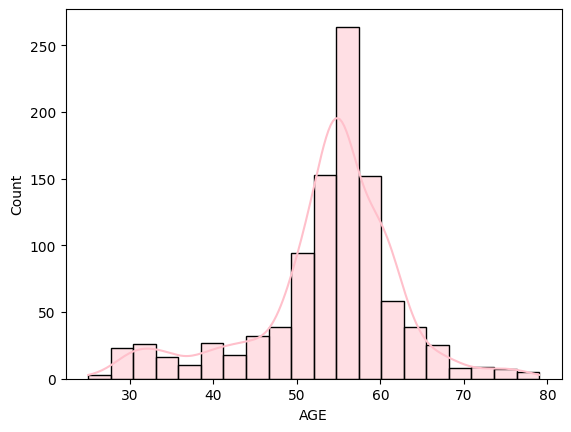

In [70]:
sns.histplot(data=df,x="AGE",bins=20,color="pink",kde=True)

<Axes: xlabel='Urea', ylabel='Count'>

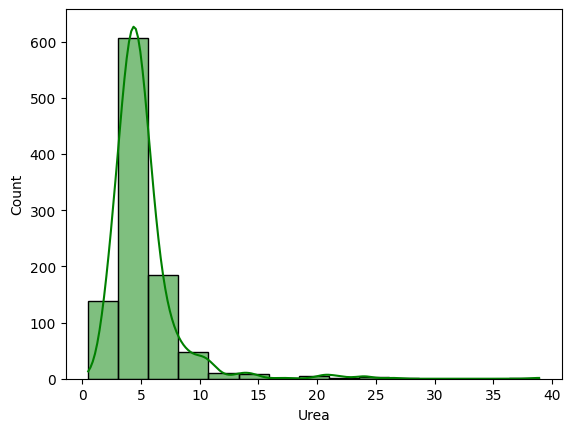

In [73]:
sns.histplot(data=df,x="Urea",bins=15,color="green",kde=True)

<Axes: xlabel='Cr', ylabel='Count'>

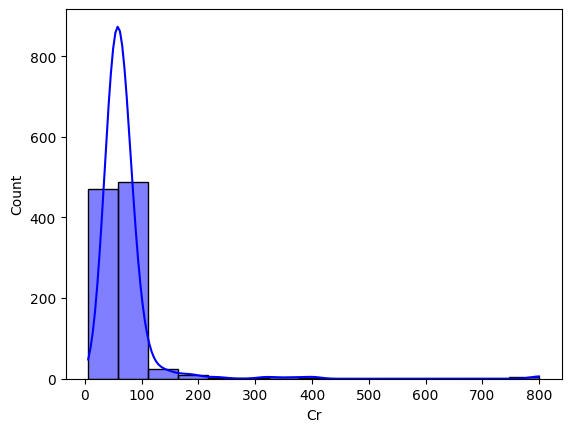

In [75]:
sns.histplot(data=df,x="Cr",bins=15,color="blue",kde=True)

BAR PLOTS

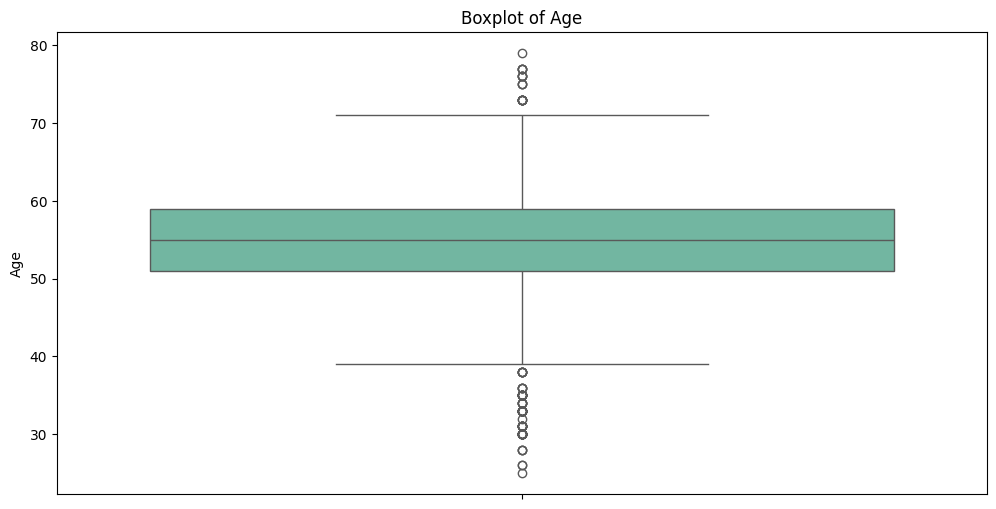

In [106]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='AGE', data=df, palette='Set2')
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

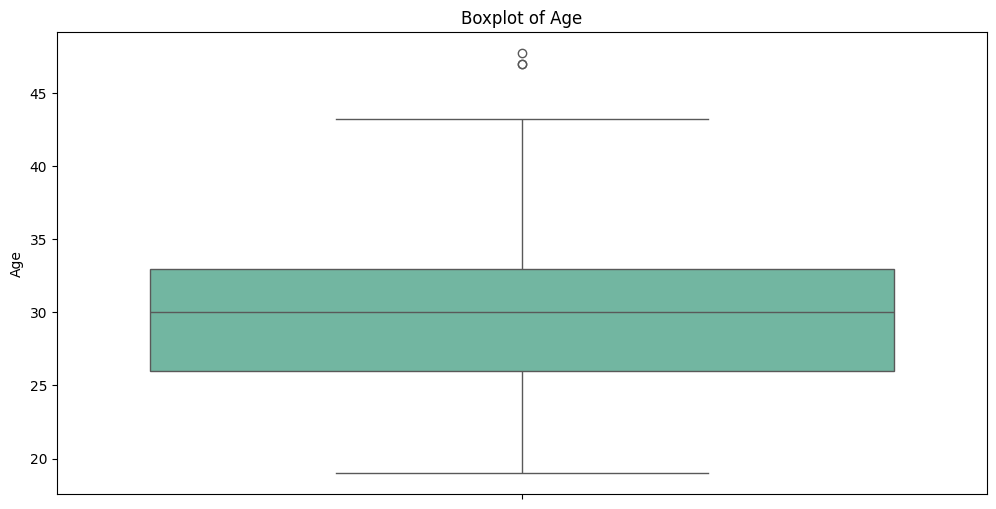

In [107]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='BMI', data=df, palette='Set2')
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

VIOLIN PLOT

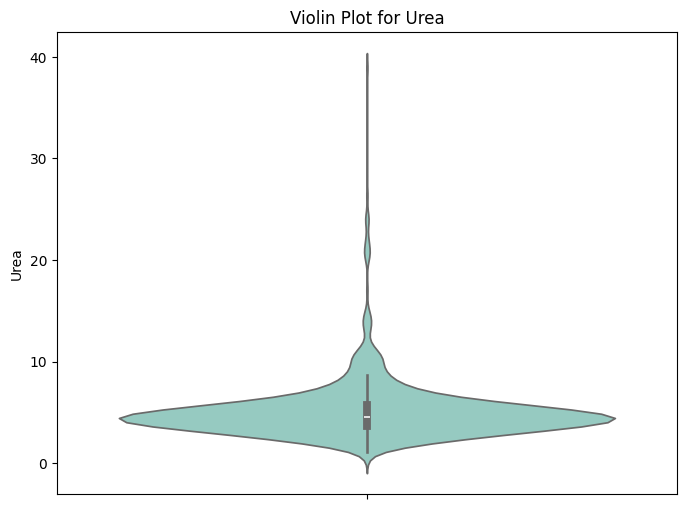

In [109]:
# Violin plot for 'Urea' variable
plt.figure(figsize=(8, 6))
sns.violinplot(y=df['Urea'], palette='Set3')
plt.title('Violin Plot for Urea')
plt.ylabel('Urea')
plt.show()

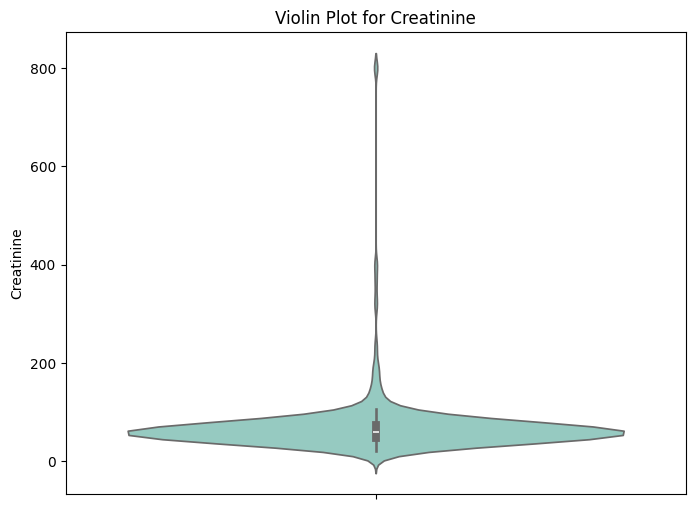

In [111]:
# Violin plot for 'Creatinine' variable
plt.figure(figsize=(8, 6))
sns.violinplot(y=df['Creatinine'], palette='Set3')
plt.title('Violin Plot for Creatinine')
plt.ylabel('Creatinine')
plt.show()

***BIVARIATE ANALYSIS***

(i)CATEGORICAL AND CATEGORICAL

CHI-SQUARE TEST

In [112]:
from scipy.stats import chi2_contingency

# Chi-Square Test for Gender and Class
contingency_table = pd.crosstab(df['Gender'], df['CLASS'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Squared: {chi2}, p-value: {p}")

Chi-Squared: 58.72501960233721, p-value: 8.28567117243922e-10


BAR CHART

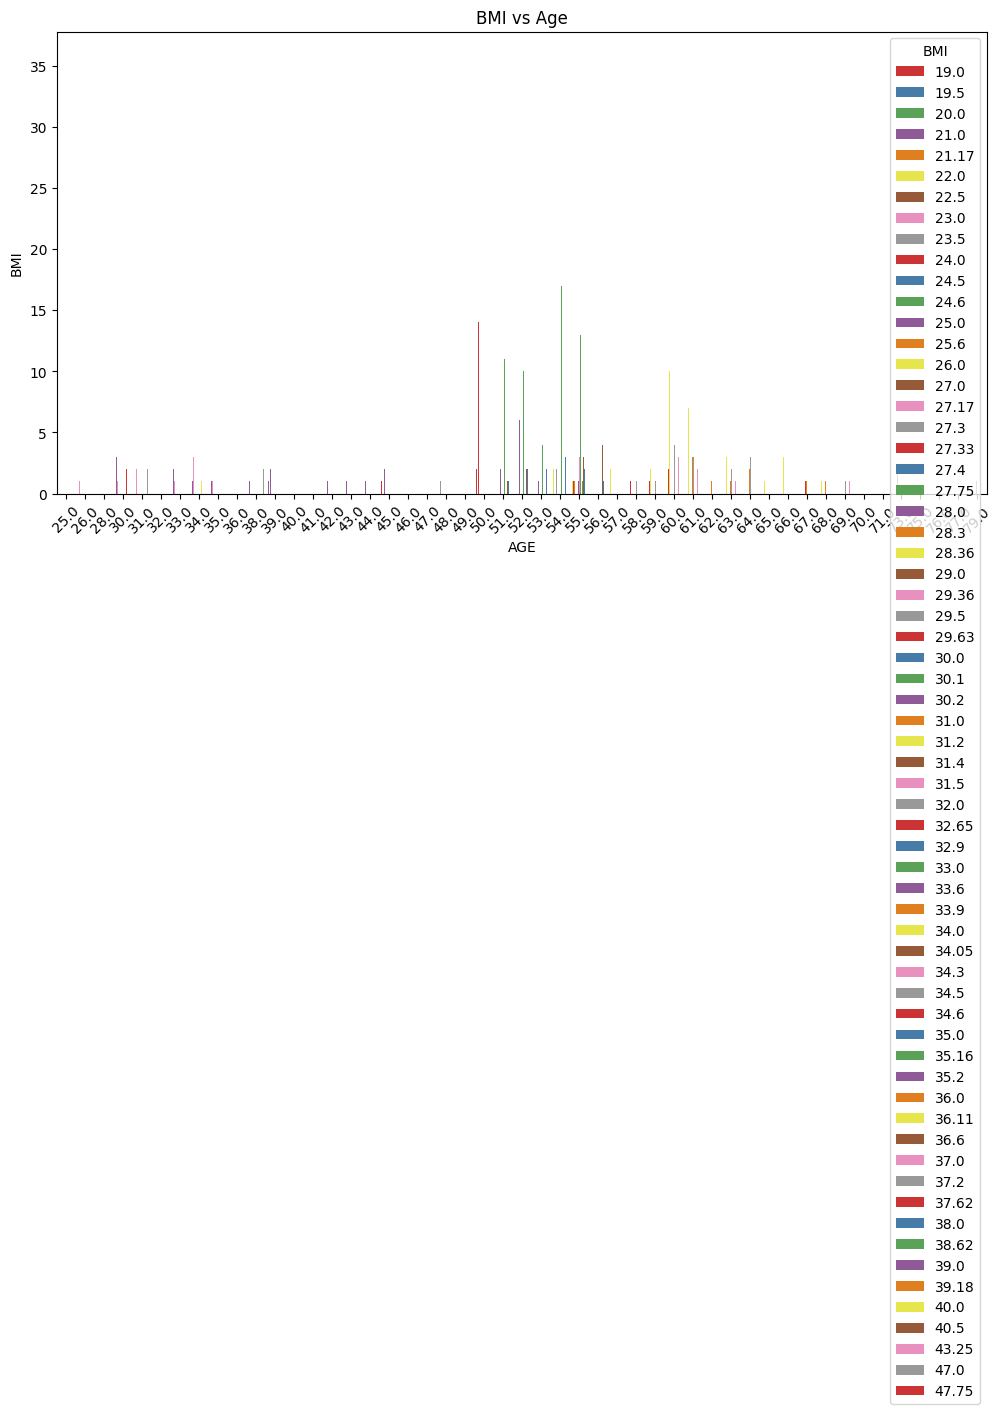

In [115]:
# Bar Chart of Workclass by Income
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='AGE', hue='BMI', palette='Set1')
plt.title('BMI vs Age')
plt.xticks(rotation=45)
plt.ylabel('BMI')

plt.show()

ii) NUMERICAL AND NUMERICAL

CORRELATION

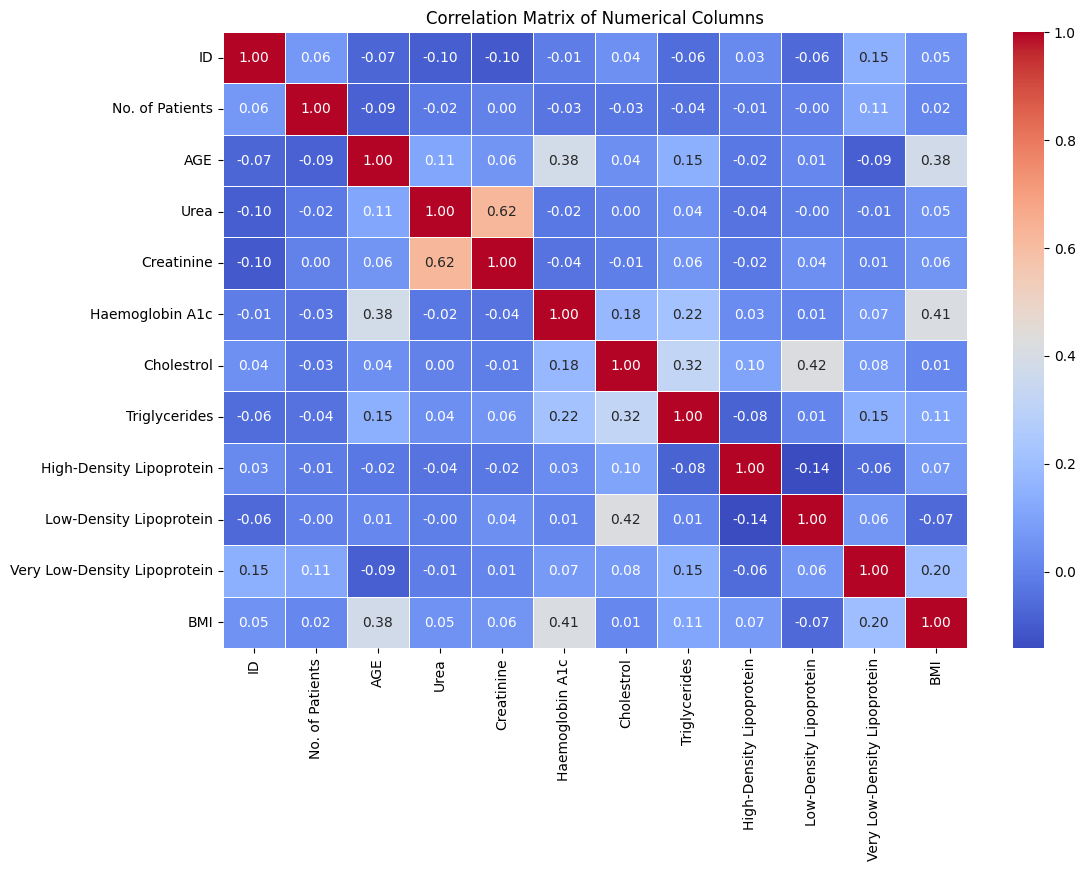

In [116]:
# Correlation Matrix
# Selecting only numerical columns for correlation
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculating the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

iii)CATEGORICAL AND NUMERICAL

Z-TEST/T-TEST/ANOVA

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
diabetic = df[df['CLASS'] == 1]['Urea']
non_diabetic = df[df['CLASS'] == 0]['Urea']

mean_d = np.mean(diabetic)
mean_nd = np.mean(non_diabetic)
std_d = np.std(diabetic)
std_nd = np.std(non_diabetic)
n_d = len(diabetic)
n_nd = len(non_diabetic)

z_statistic, p_value_z = stats.ttest_ind(diabetic, non_diabetic, equal_var=False)  
print(f"Z-test Statistic: {z_statistic}, P-value: {p_value_z}")


bmi_diabetic = df[df['CLASS'] == 1]['BMI']
bmi_non_diabetic = df[df['CLASS'] == 0]['BMI']


t_statistic, p_value_t = stats.ttest_ind(bmi_diabetic, bmi_non_diabetic, equal_var=False)
print(f"T-test Statistic: {t_statistic}, P-value: {p_value_t}")


df['Agegroup'] = pd.cut(df['AGE'], bins=[0, 30, 50, 100], labels=['Young', 'Middle-aged', 'Senior'])


model = ols('Creatinine ~ C(AgeGroup)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


PAIR PLOTS

KeyboardInterrupt: 

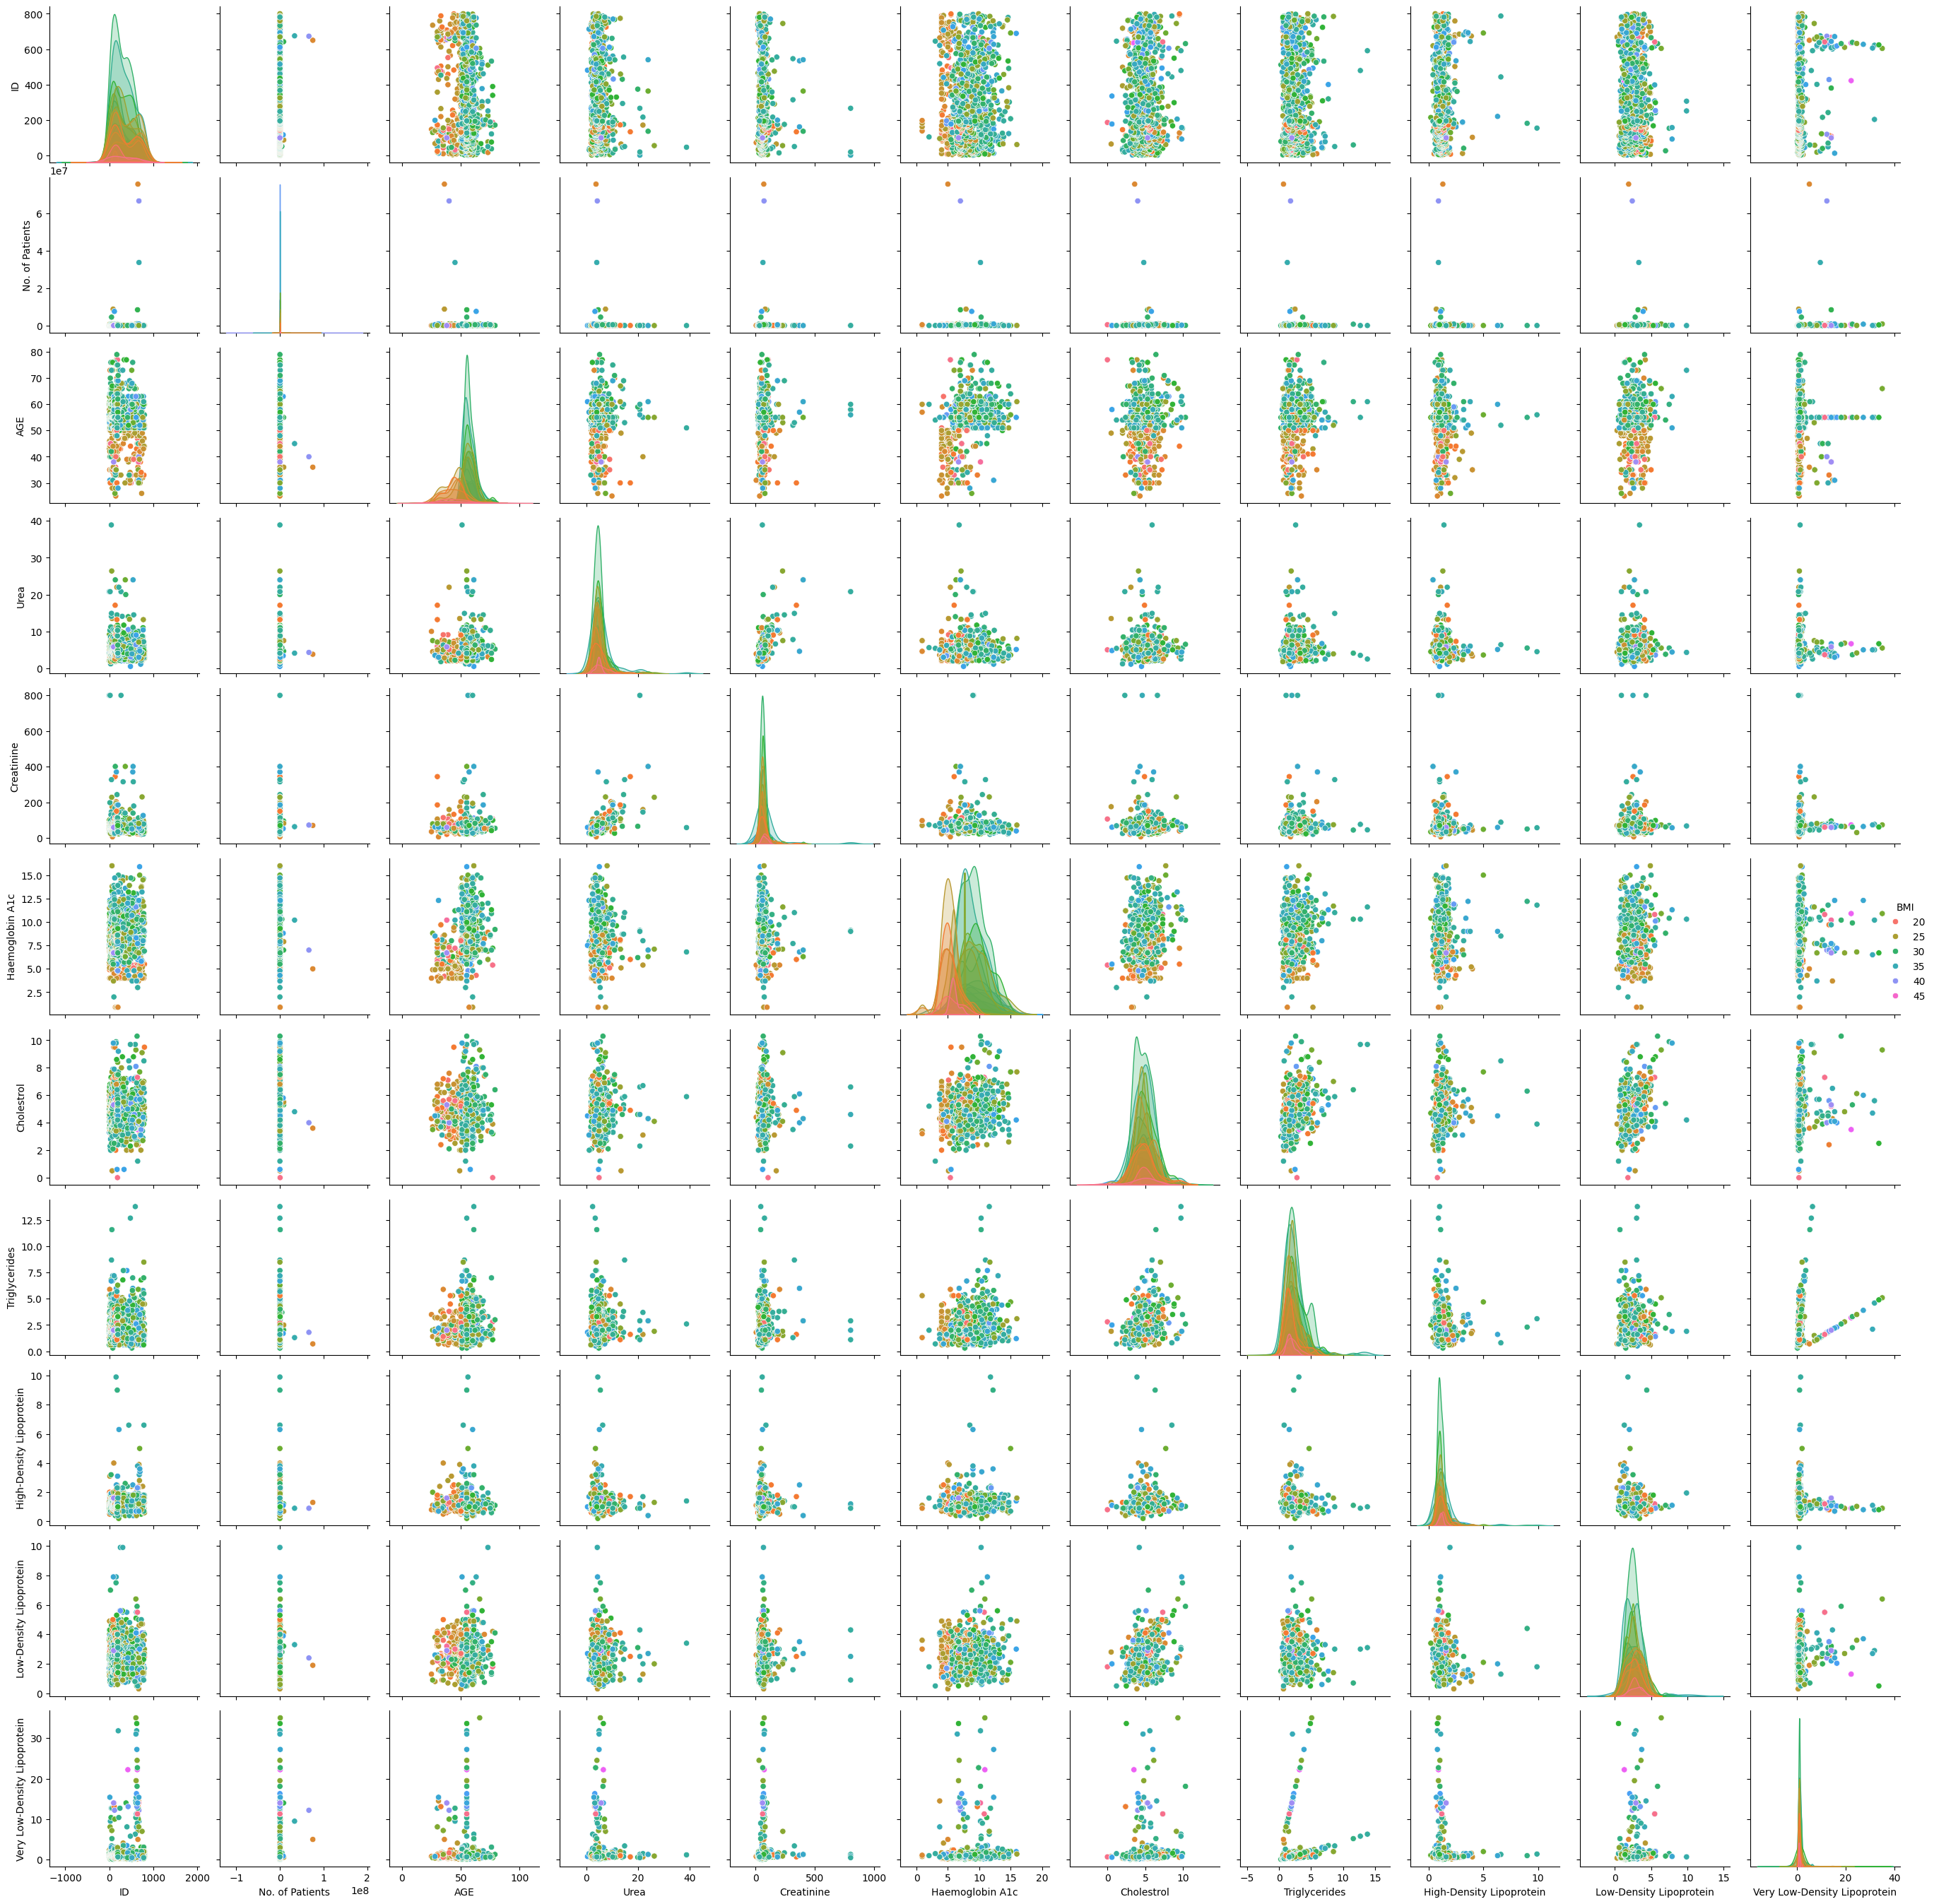

In [128]:
# Pairplot for Numerical Variables
sns.pairplot(df, hue='BMI', palette='husl', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables ', y=1.02)
plt.show()